# Modeling Clustering Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1. Clustering with the Iris Dataset

    Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    
    b. Visualize the results of your clustering.
    
    c. Use the elbow method to visually select a good value for k.
    
    d. Repeat the clustering, this time with 3 different features.
    
    
2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


3. How does scaling impact the results of clustering?

    Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

> **Problem #1, a-c**

### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df["sepal_area"] = df.sepal_length * df.sepal_width
df["petal_area"] = df.petal_length * df.petal_width

In [4]:
# data split
train_and_validate, test = train_test_split(df, test_size=.2, random_state=666)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=666)

# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width', 'sepal_area', 'petal_area']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

### Cluster

In [5]:
X = train_scaled[['sepal_width', 'sepal_length']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [6]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,sepal_width,sepal_length
0,0.071280,1.247755
1,1.478481,-0.646858
2,-0.602823,0.240402
3,0.225825,-1.285188
4,-1.511630,-0.409231


In [7]:
X.shape

(108, 2)

In [8]:
kmeans.labels_.shape

(108,)

In [9]:
train['cluster'] = kmeans.labels_

<ipython-input-9-2c11d432e536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cluster'] = kmeans.labels_


In [10]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04,2
15,5.7,4.4,1.5,0.4,setosa,25.08,0.60,1
137,6.4,3.1,5.5,1.8,virginica,19.84,9.90,0
108,6.7,2.5,5.8,1.8,virginica,16.75,10.44,2
96,5.7,2.9,4.2,1.3,versicolor,16.53,5.46,2
...,...,...,...,...,...,...,...,...
11,4.8,3.4,1.6,0.2,setosa,16.32,0.32,3
126,6.2,2.8,4.8,1.8,virginica,17.36,8.64,2
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51,1
99,5.7,2.8,4.1,1.3,versicolor,15.96,5.33,2


In [11]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
cluster,,,,,,
0,6.886207,3.110345,5.513793,1.927586,21.437931,10.762069
1,5.310000,3.735000,1.655000,0.355000,19.860500,0.779500
2,6.048148,2.811111,4.714815,1.577778,16.982222,7.575185
3,4.778947,3.178947,1.468421,0.221053,15.212105,0.331053
4,5.507692,2.407692,3.992308,1.276923,13.245385,5.248462


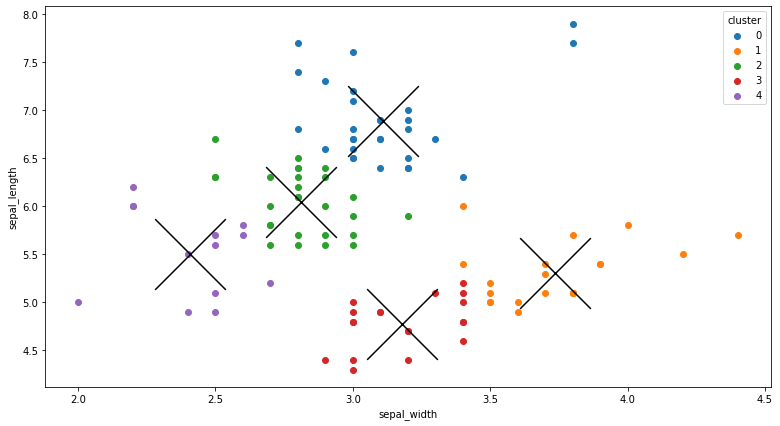

In [12]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.sepal_width, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel='sepal width')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='sepal_width', marker='x', s=5000, ax=ax, c='black')

### Choosing a K value

In [13]:
# sum of squared distances from each point to its cluster center
kmeans.inertia_

43.01024142647655

I've found that my clustering with ```k = 5``` (instead of ```k = 4``` as in the lesson) leads to groups that are closer together.

> Elbow Method:
> * Choose a range of k values
> * Create a model for each k and record inertia
> * Visualize results (k vs inertia)

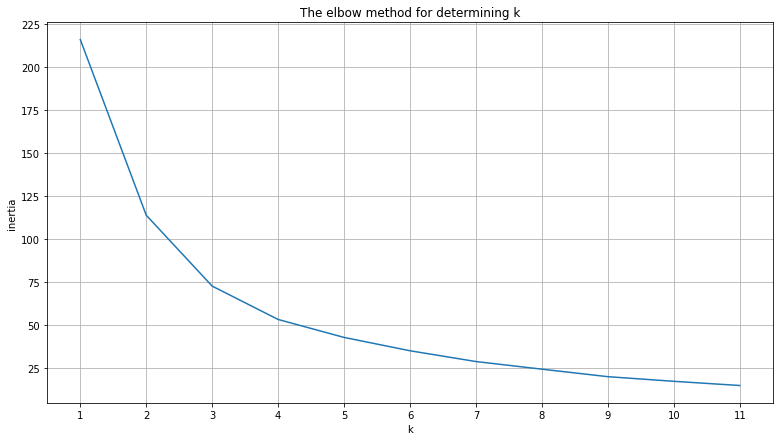

In [14]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

I'll try 3 clusters instead of 5 next time, and different features.

> **Problem #1, d**

In [15]:
X = train_scaled[['petal_width', 'petal_length']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [16]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,petal_width,petal_length
0,-1.218387,-1.254667
1,0.213273,0.325818
2,1.135909,1.057291


In [17]:
X.shape

(108, 2)

In [18]:
kmeans.labels_.shape

(108,)

In [19]:
train['cluster'] = kmeans.labels_

<ipython-input-19-2c11d432e536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cluster'] = kmeans.labels_


In [20]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area,cluster
95,5.7,3.0,4.2,1.2,versicolor,17.10,5.04,1
15,5.7,4.4,1.5,0.4,setosa,25.08,0.60,0
137,6.4,3.1,5.5,1.8,virginica,19.84,9.90,2
108,6.7,2.5,5.8,1.8,virginica,16.75,10.44,2
96,5.7,2.9,4.2,1.3,versicolor,16.53,5.46,1
...,...,...,...,...,...,...,...,...
11,4.8,3.4,1.6,0.2,setosa,16.32,0.32,0
126,6.2,2.8,4.8,1.8,virginica,17.36,8.64,2
18,5.7,3.8,1.7,0.3,setosa,21.66,0.51,0
99,5.7,2.8,4.1,1.3,versicolor,15.96,5.33,1


In [21]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
cluster,,,,,,
0,5.026316,3.465789,1.486842,0.255263,17.522105,0.386316
1,5.955556,2.741667,4.280556,1.330556,16.416111,5.768889
2,6.652941,3.002941,5.573529,2.023529,20.053824,11.305294


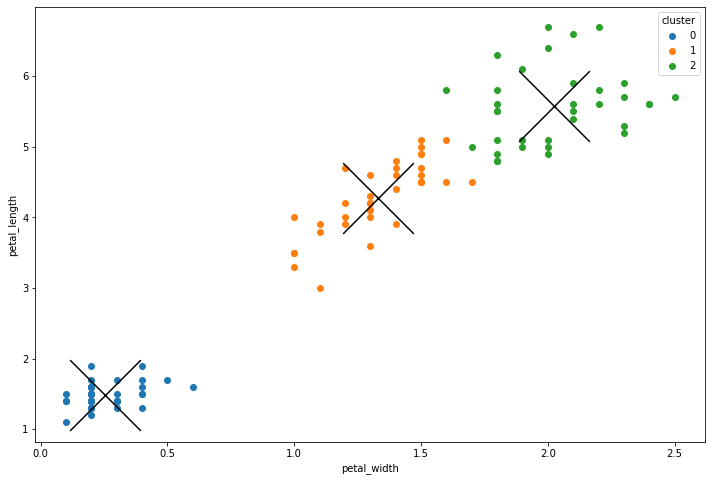

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_width, subset.petal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='petal length', xlabel='petal width')

train.groupby('cluster').mean().plot.scatter(y='petal_length', x='petal_width', marker='x', s=5000, ax=ax, c='black')

> **Problem #2**

In [23]:
# import mall customers data set
from acquire import get_mall_data
from prepare import prep_mall_data

In [24]:
df = get_mall_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
train, test, validate = prep_mall_data(df)
print('train:', train.shape, 'validate:', validate.shape, 'test:', test.shape)

train: (144, 5) validate: (26, 5) test: (30, 5)


In [26]:
train.head()

,customer_id,age,annual_income,spending_score,is_female
34,35,49,33,14,1
43,44,31,39,61,1
174,175,52,88,13,1
164,165,50,85,26,0
92,93,48,60,49,0


In [27]:
# choose features to cluster on
X = train[['annual_income', 'age', 'is_female']]
Xv = validate[['annual_income', 'age', 'is_female']]
Xt = test[['annual_income', 'age', 'is_female']]

# create and fit object
kmeans = KMeans(n_clusters = 3).fit(X)

# creating predicted values
train['cluster'] = kmeans.predict(X)

validate['cluster'] = kmeans.predict(Xv)

test['cluster'] = kmeans.predict(Xt)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

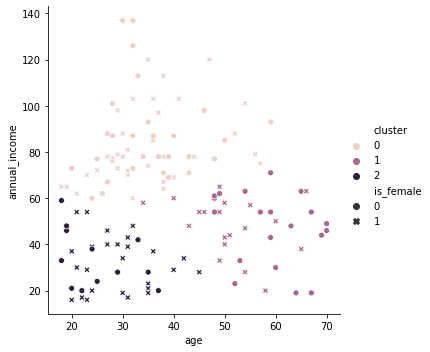

In [28]:
sns.relplot(data=train, x='age', y='annual_income', hue='cluster', style='is_female')

 > **Problem #3**
> 
> How does scaling impact the results of clustering?
> 
> Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

Scaling makes the clusters much more accurate. I'll scale the mall data.

In [29]:
scaler = MinMaxScaler().fit(train)
train_scaled = (pd.DataFrame(scaler.transform(train), 
                      columns=train.columns, 
                      index=train.index))
validate_scaled = (pd.DataFrame(scaler.transform(validate), 
                     columns=validate.columns,
                     index=validate.index))
test_scaled = (pd.DataFrame(scaler.transform(test), 
                     columns=test.columns,
                     index=test.index))

In [30]:
# choose features to cluster on
X = train_scaled[['annual_income', 'age', 'is_female']]
Xv = validate_scaled[['annual_income', 'age', 'is_female']]
Xt = test_scaled[['annual_income', 'age', 'is_female']]

# create and fit object
kmeans = KMeans(n_clusters = 3).fit(X)

# creating predicted values
train_scaled['cluster'] = kmeans.predict(X)

validate_scaled['cluster'] = kmeans.predict(Xv)

test_scaled['cluster'] = kmeans.predict(Xt)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

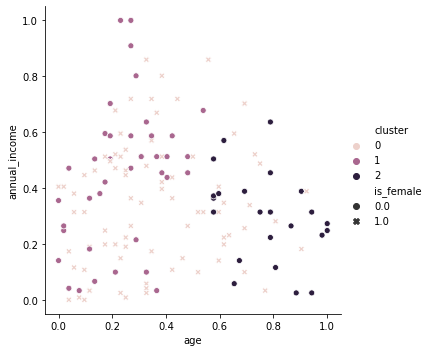

In [31]:
sns.relplot(data=train_scaled, x='age', y='annual_income', hue='cluster', style='is_female')

The scaling really changed things. Much more realistic distribution, visually.